# Data Project - Stock Market Analysis
Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!  

We'll be answering the following questions along the way:  

1.) What was the change in price of the stock over time?  
2.) What was the daily return of the stock on average?  
3.) What was the moving average of the various stocks?  
4.) What was the correlation between different stocks' closing prices?  
4.) What was the correlation between different stocks' daily returns?  
5.) How much value do we put at risk by investing in a particular stock?  
6.) How can we attempt to predict future stock behavior?  

**Basic Analysis of Stock Information**  
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
%matplotlib inline

In [3]:
#to read data online
from pandas_datareader.data import DataReader

C:\Users\chi_b\Anaconda2\envs\ipykernel_py3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
from datetime import datetime

In [5]:
#Apple, Google, Microsoft, Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
#from 1 year ago to today
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,256.495771,250.731186,253.238458,253.847786,3.356105e+07,252.391494
std,43.681213,42.503597,42.932815,43.289506,1.717131e+07,43.760414
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,213.350006,210.029999,210.880005,210.350006,2.184720e+07,208.658981
50%,259.079987,252.000000,255.940002,257.239990,2.853960e+07,255.172012
75%,293.690002,285.799988,287.380005,289.799988,3.838310e+07,288.442780
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [9]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,173.005280
2019-06-03,177.919998,170.270004,175.600006,173.300003,40396100.0,171.256134
2019-06-04,179.830002,174.520004,175.440002,179.639999,30968000.0,177.521378
2019-06-05,184.990005,181.139999,184.279999,182.539993,29773400.0,180.387146
...,...,...,...,...,...,...
2020-05-22,319.230011,315.350006,315.769989,318.890015,20450800.0,318.890015
2020-05-26,324.239990,316.500000,323.500000,316.730011,31380500.0,316.730011
2020-05-27,318.709991,313.089996,316.140015,318.109985,28236300.0,318.109985


# 1. What was the change in price of stock over time?

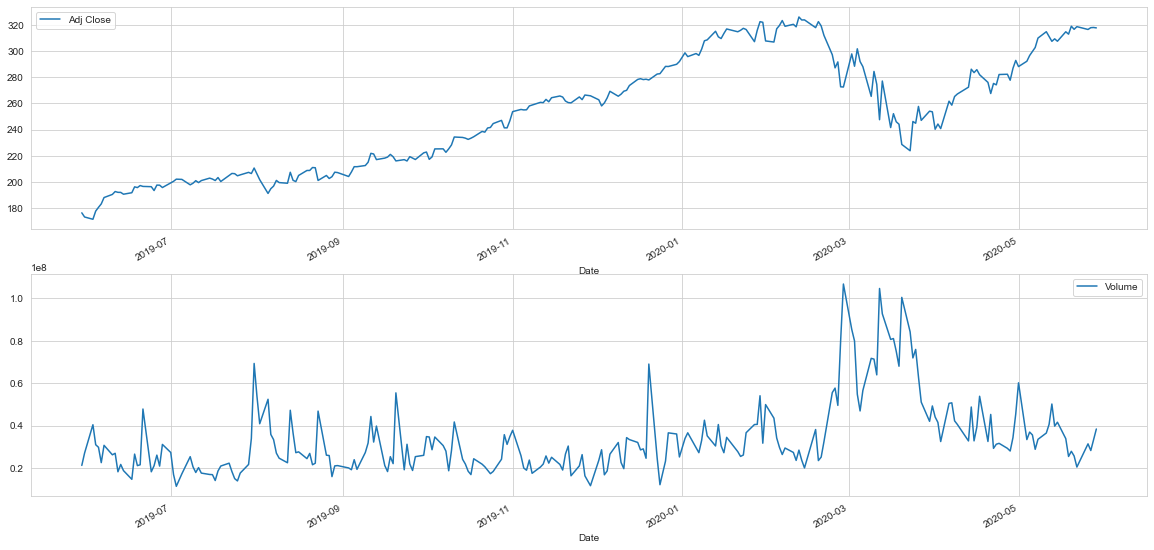

In [10]:
fig , (ax1,ax2) = plt.subplots(2,1)

AAPL['Adj Close'].plot(ax=ax1,figsize=(20,10),legend=True)
AAPL['Volume'].plot(ax=ax2,figsize=(20,10),legend=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FF37EB5E0>,
      dtype=object)

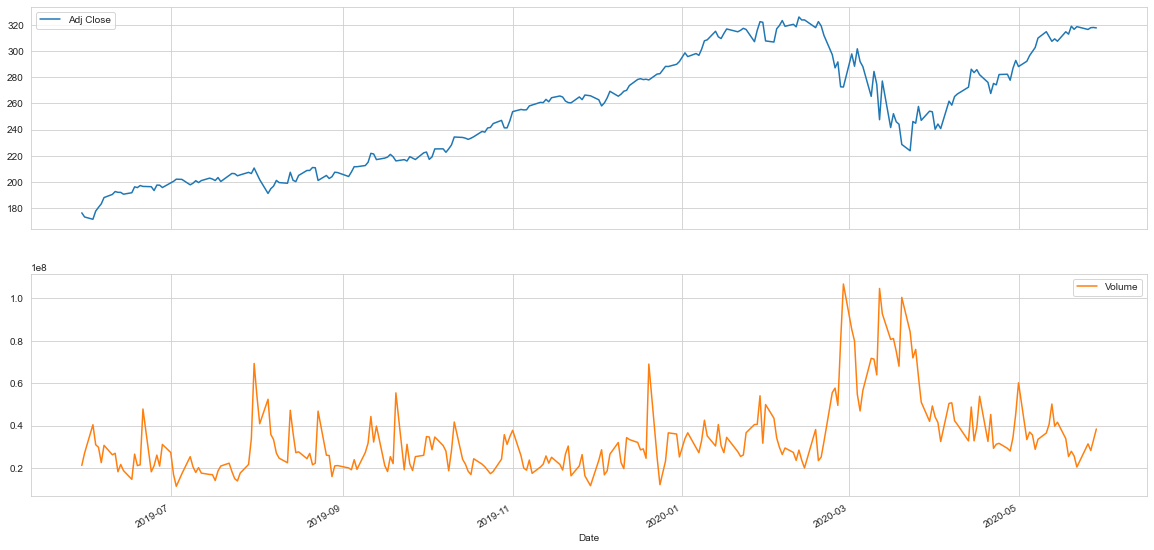

In [11]:
AAPL[['Adj Close','Volume']].plot(subplots=True,figsize=(20,10),legend=True)

Let's look into that adj close dip and relative max between 2020-03 to 2020-05 caused by COVID-19

In [12]:
AAPL.loc['2020-03-01':'2020-05-01'].idxmin()

High        2020-03-23
Low         2020-03-23
Open        2020-03-23
Close       2020-03-23
Volume      2020-04-28
Adj Close   2020-03-23
dtype: datetime64[ns]

In [13]:
AAPL.loc['2020-03-23']

High         2.285000e+02
Low          2.126100e+02
Open         2.280800e+02
Close        2.243700e+02
Volume       8.418820e+07
Adj Close    2.237643e+02
Name: 2020-03-23 00:00:00, dtype: float64

The lowest AAPL adjusted close is on 2020-03-23.
On that day, a lot of transactions were made (over 84,000,000 transactions), probably out of panic

# 1. + 2. Moving Averages

## AAPL

In [14]:
#range of moving averages for 10,20,50 days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189,NaN,NaN,NaN
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,173.005280,NaN,NaN,NaN
2019-06-03,177.919998,170.270004,175.600006,173.300003,40396100.0,171.256134,NaN,NaN,NaN
2019-06-04,179.830002,174.520004,175.440002,179.639999,30968000.0,177.521378,NaN,NaN,NaN
2019-06-05,184.990005,181.139999,184.279999,182.539993,29773400.0,180.387146,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-22,319.230011,315.350006,315.769989,318.890015,20450800.0,318.890015,313.439005,303.243341,276.928248
2020-05-26,324.239990,316.500000,323.500000,316.730011,31380500.0,316.730011,313.611005,304.959564,277.718457
2020-05-27,318.709991,313.089996,316.140015,318.109985,28236300.0,318.109985,314.281003,306.973668,279.249534


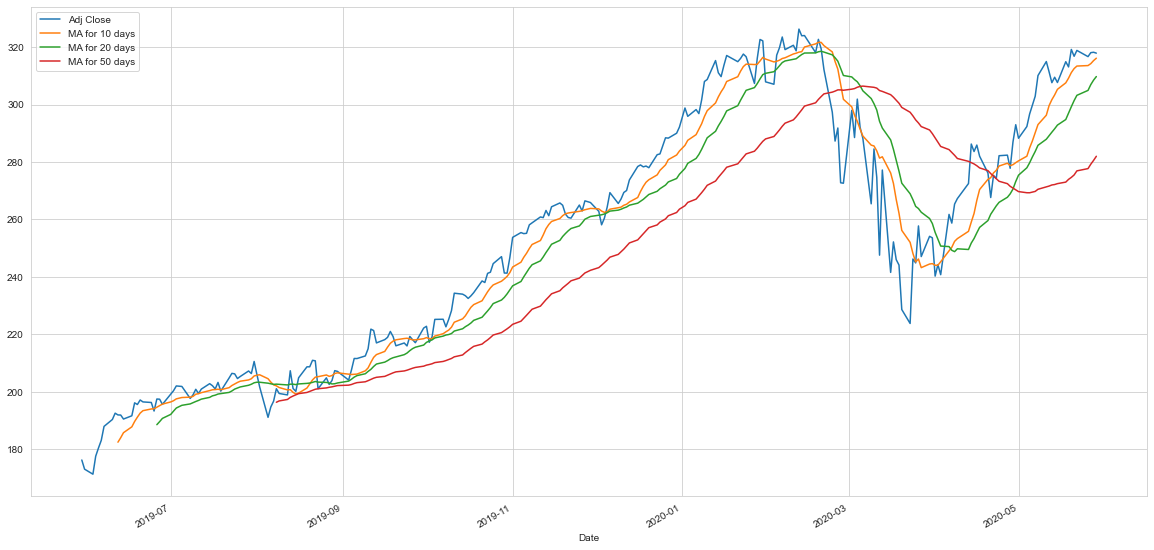

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10))

Overall, recently the adjusted close is higher than all the moving averages, especially the moving average for 50 days. It looks like everything is recovering with the uptrend.  
The shorter moving averages crossed above the 50 days one during late April suggested an uptrend and a good buying period  
Investing in AAPL still looks like a great investment despite of COVID-19 as the stock adj close has an uptrend overall

## AMZN

In [16]:
for ma in ma_day:

    column_name = 'MA for %s days' %(str(ma))
    AMZN[column_name] = pd.Series(AMZN['Adj Close']).rolling(window=ma).mean()

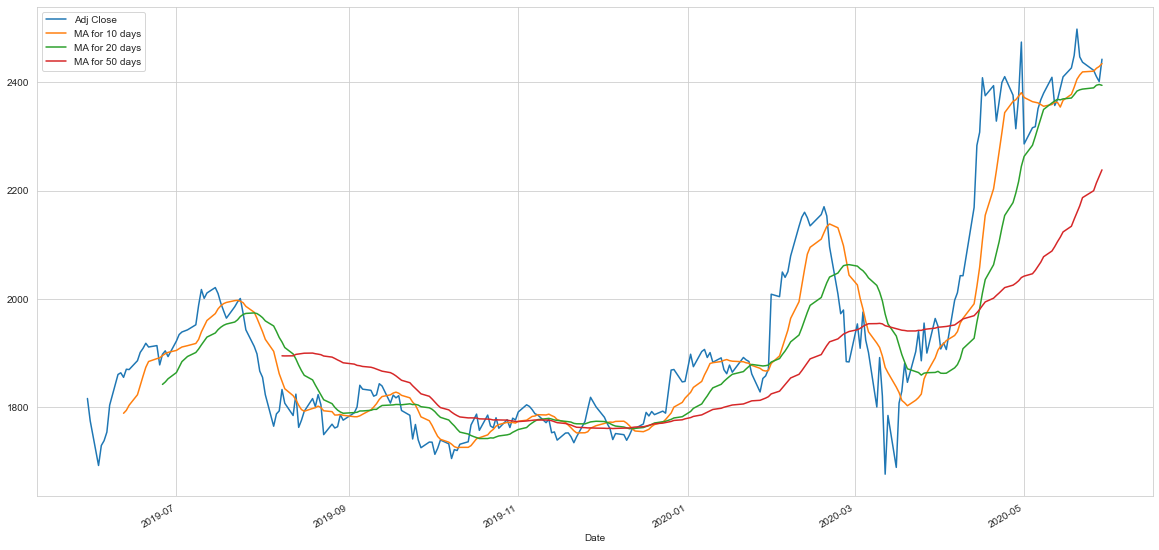

In [17]:
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10),legend=True)

## GOOG

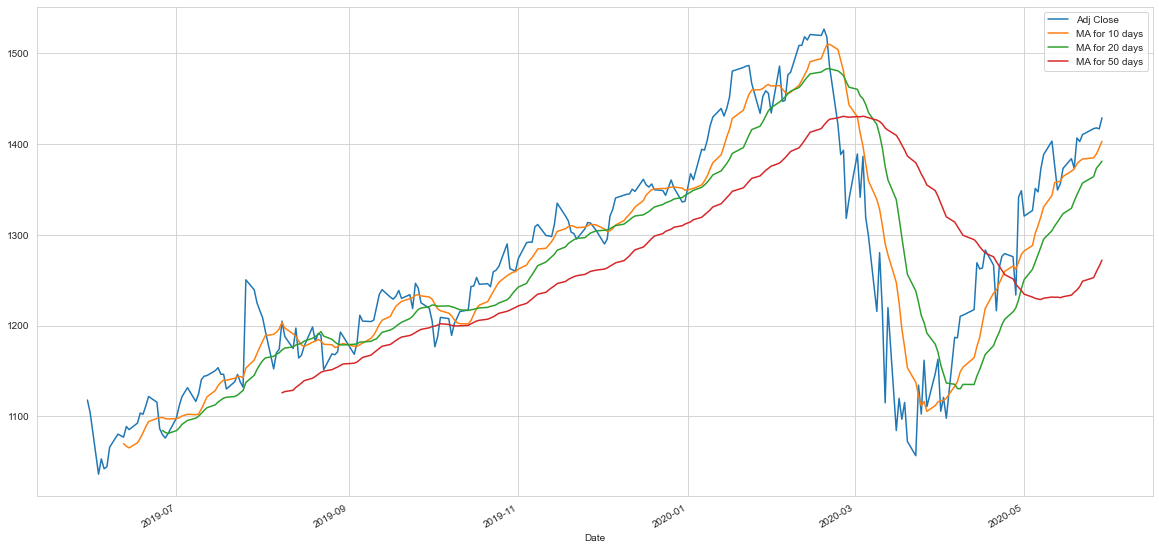

In [18]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma).mean()

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10),legend=True)

## MSFT

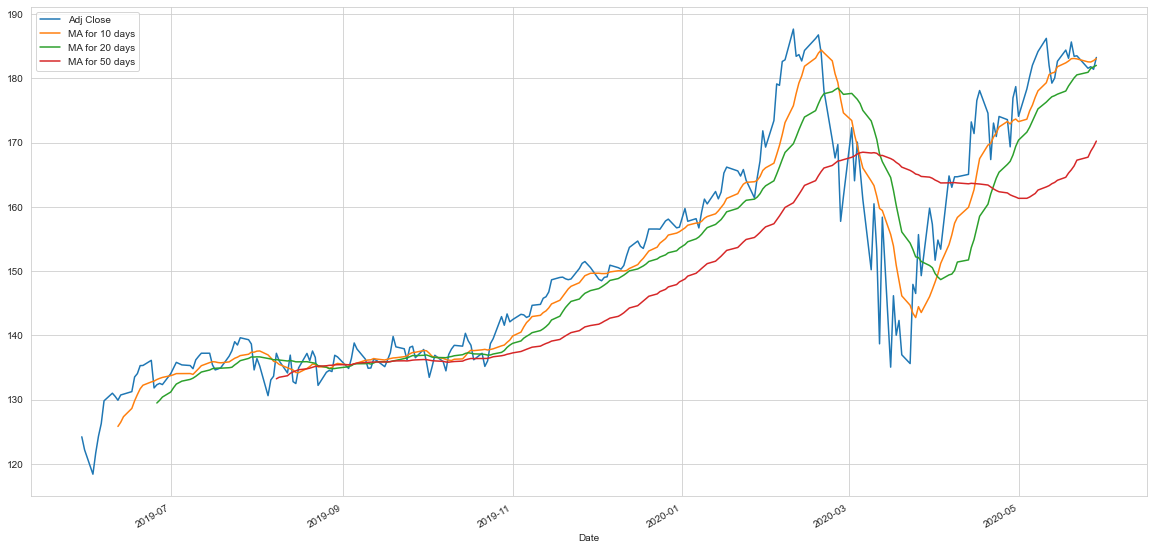

In [19]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    MSFT[column_name] = MSFT['Adj Close'].rolling(window=ma).mean()
    
MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(20,10),subplots=False,legend=True)

# Daily Return and Risk of Stock

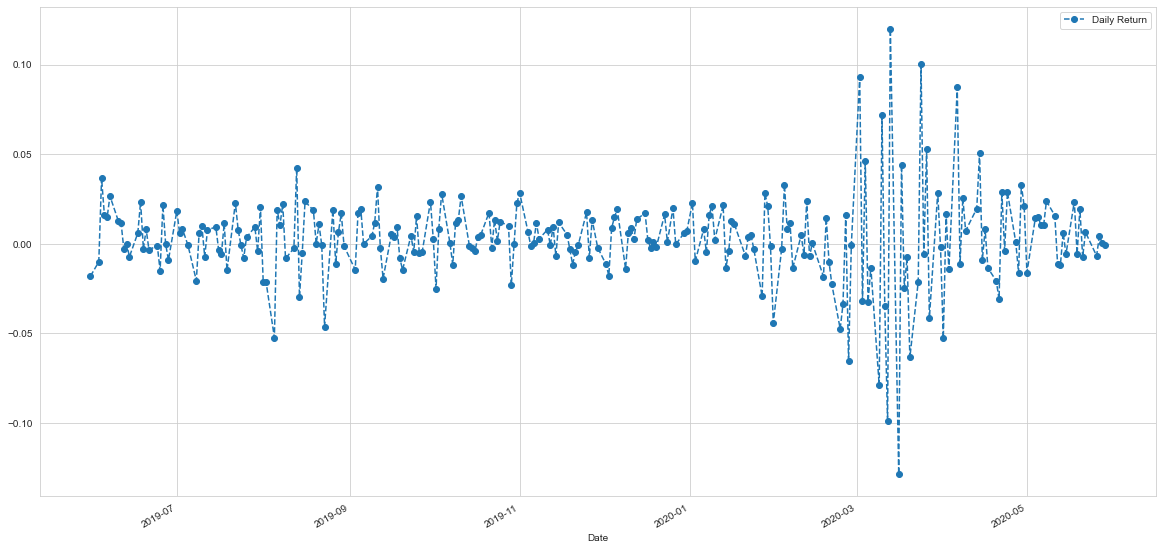

In [20]:
#Let's make a daily return column = percent change of adjc close
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(20,10),legend = True, linestyle='--',
                          marker='o')

In [21]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()

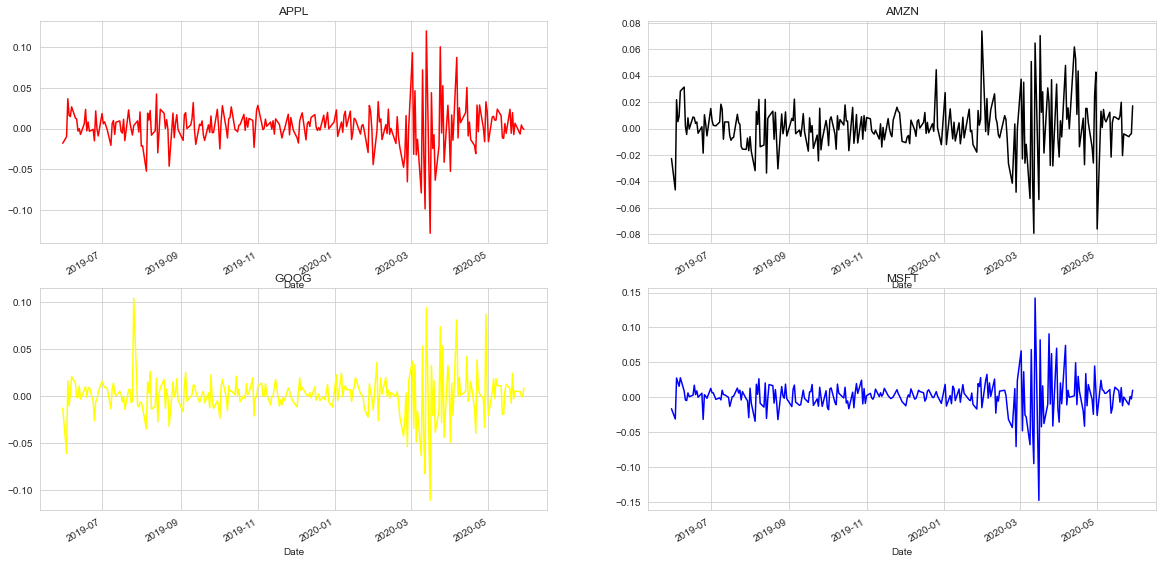

In [22]:
fig, axes = plt.subplots(2,2,figsize=(20,10))

AAPL['Daily Return'].plot(ax=axes[0,0],color='red',title='APPL')
AMZN['Daily Return'].plot(ax=axes[0,1],color='k',title='AMZN')
GOOG['Daily Return'].plot(ax=axes[1,0],color='yellow',title='GOOG')
MSFT['Daily Return'].plot(ax=axes[1,1],color='blue',title='MSFT')

plt.figsize=(20,10)

In [23]:
AAPL['Daily Return'].idxmin()

Timestamp('2020-03-16 00:00:00')

People lost the most when buying on 2020-03-16 (almost 15%) but the daily return varied greatly during the period due to COVID-19. However, it looks like it has calmed down as time goes on

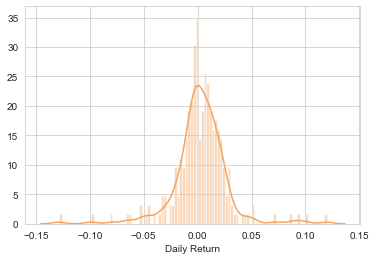

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color = 'sandybrown')

In [25]:
#let's look at Adj Close for all of our company in tech_list

closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [26]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-30,176.197189,1117.949951,124.201653,1816.319946
2019-05-31,173.005280,1103.630005,122.176575,1775.069946
2019-06-03,171.256134,1036.229980,118.383247,1692.689941
2019-06-04,177.521378,1053.050049,121.662903,1729.560059
2019-06-05,180.387146,1042.219971,124.300446,1738.500000


In [27]:
tech_ret = closing_df.pct_change().dropna()
tech_ret

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-31,-0.018116,-0.012809,-0.016305,-0.022711
2019-06-03,-0.010110,-0.061071,-0.031048,-0.046409
2019-06-04,0.036584,0.016232,0.027704,0.021782
2019-06-05,0.016143,-0.010284,0.021679,0.005169
2019-06-06,0.014682,0.002034,0.015815,0.009123
...,...,...,...,...
2020-05-22,0.006438,0.005432,0.000436,-0.004030
2020-05-26,-0.006774,0.004679,-0.010572,-0.006164
2020-05-27,0.004357,0.000579,0.001322,-0.004736


# 4. What are the correlations between stocks

## Daily Return

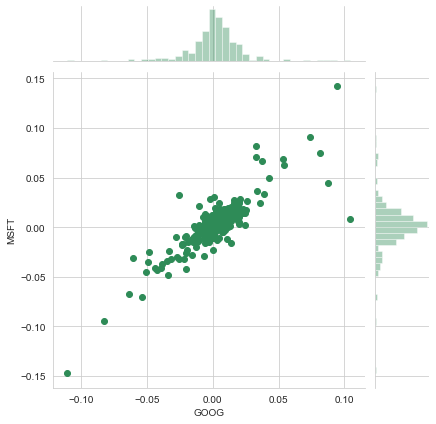

In [28]:

sns.jointplot('GOOG','MSFT',tech_ret,kind='scatter',color='seagreen')

In [29]:
stats.pearsonr(tech_ret.GOOG,tech_ret.MSFT)

(0.8517811043520949, 3.830106704253741e-72)

GOOGLE and MICROSOFT
Looks like a positive linear correlation which is around 0.85.
In the past, the correlation was not this strong. For a year ago until now, they seem to go hand in hand

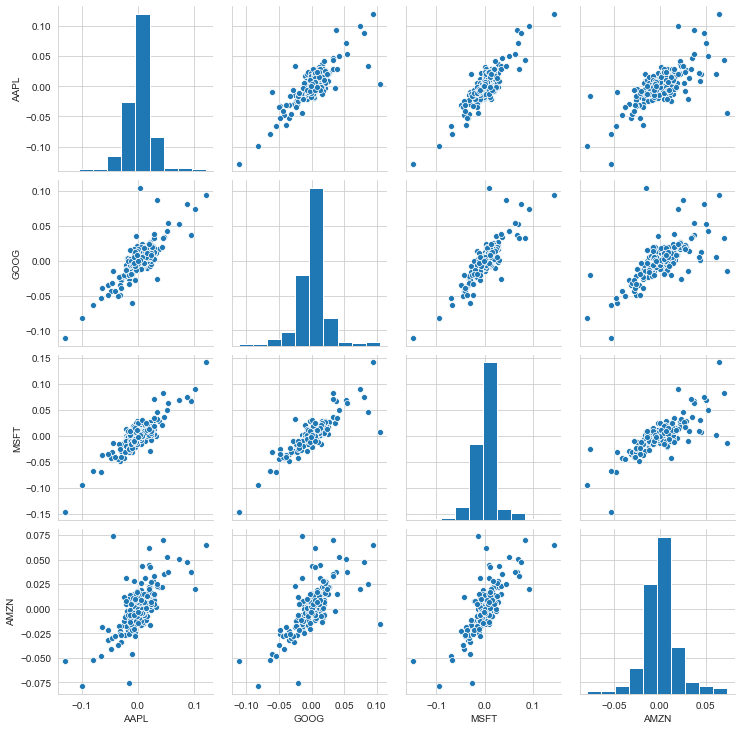

In [30]:
sns.pairplot(tech_ret)

A quick glance shows that most of these stocks have a positive correlation

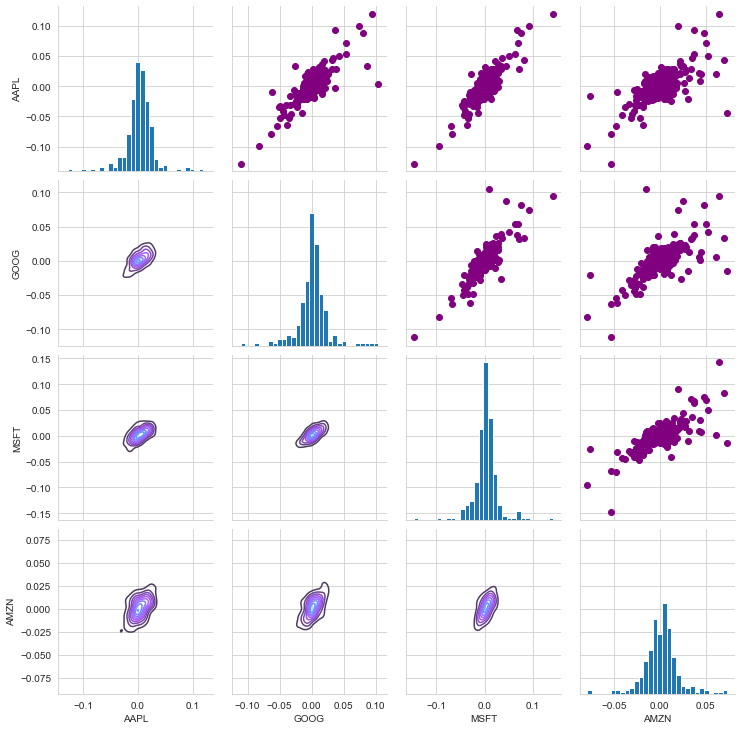

In [31]:
return_fig = sns.PairGrid(tech_ret)

return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

In [32]:
tech_ret.describe()

Symbols,AAPL,GOOG,MSFT,AMZN
count,252.000000,252.000000,252.000000,252.000000
mean,0.002663,0.001235,0.001860,0.001370
std,0.025226,0.022877,0.025140,0.019760
min,-0.128647,-0.111008,-0.147390,-0.079221
25%,-0.007156,-0.006151,-0.008332,-0.007829
50%,0.002643,0.001182,0.001637,0.002054
75%,0.014530,0.010370,0.011149,0.009547
max,0.119808,0.104485,0.142169,0.073791


On average, over the year, these stocks return a bit lower than 0.1% daily and their daily return has a strong positive correlation

## Closing Prices

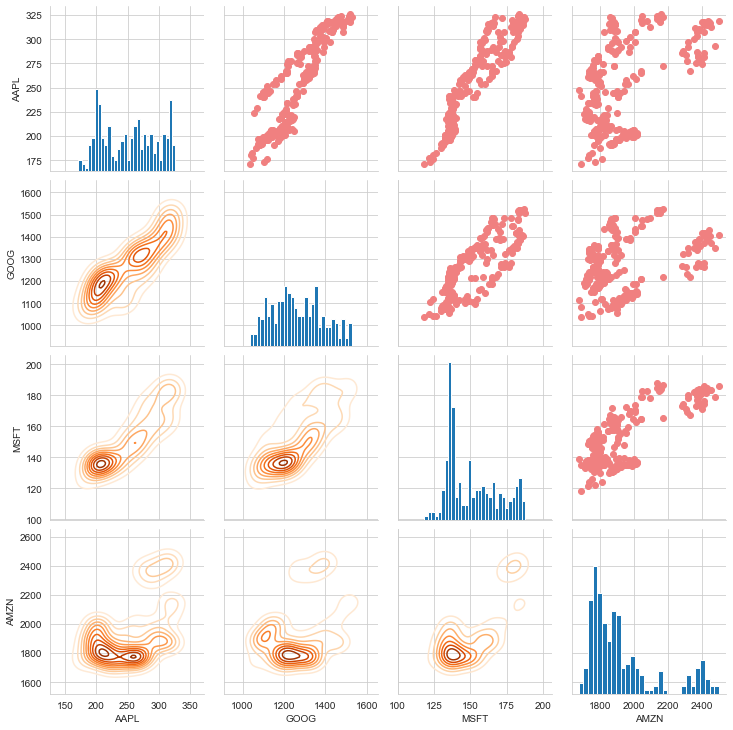

In [33]:
close_fig = sns.PairGrid(closing_df)

close_fig.map_upper(plt.scatter,color='lightcoral')
close_fig.map_lower(sns.kdeplot, cmap='Oranges')
close_fig.map_diag(plt.hist,bins=30)

There are correlations between GOOG and AAPL, AAPL and MSFT, GOOG and MSF (with a bigger linear regression residue). AMZN's closing price has a positive correlation with other companies as well, but not as strong. AMZN closing price distribution is more skewed to the right than others

# 4. Correlation between daily returns, Correlation between closing prices

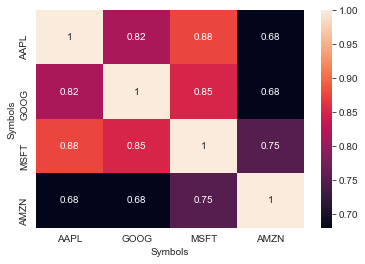

In [34]:
sns.heatmap(data=tech_ret.corr(),annot=True)

### Daily Return Correlations
GOOG and AAPL, MSFT and AAPL, GOOG and MSFT have the strongest correlations.
Nonetheless, all correlations are positive.

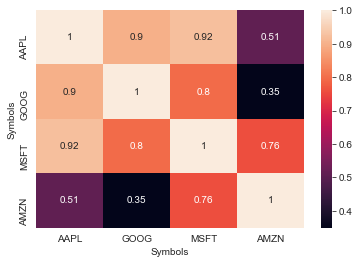

In [35]:
sns.heatmap(data=closing_df.corr(),annot=True)

### Closing Price Correlations

There are also strong positive correlations between GOOG and AAPL, MSFT and AAPL, GOOG and MSFT

# 5. How much value is at risk when we invest in a particular stock?

One method is comparing the expected return with the standard deviation of the daily returns.  
**Risk (SD of daily return) vs Expected Return**

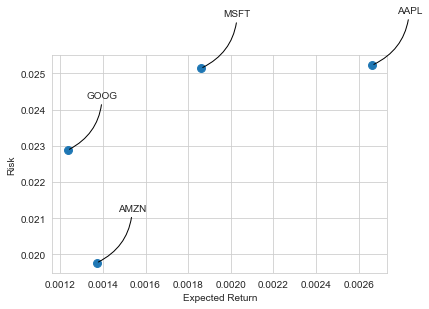

In [36]:
rets = tech_ret

area = np.pi*20   #define the area for the circle of the scatter plot( easier to see)

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#More annotation guide: matplotlib.org/users/annotations_guide.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext= (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', color = 'black',connectionstyle = 'arc3,rad=-0.3')
    )

Normally we would look for stocks with high expected return and lower risk but life is not perfect. On the bright side, all of these stocks have a positive expected return.    
AMZN has the lowest risk but the expected return is not as google as MSFT and AAPL.  
GOOG seems quite high risk with low expected return for the current year.  
AAPL is a go big or go home this year

## Value of Risk:
The amount of money we expect to lose for a given confidence interval

**Bootstrap method and Monte Carlo method**

### Bootstrap method:
Calculating the empirical quantiles from a histogram of daily returns

**a. Apple Stocks**

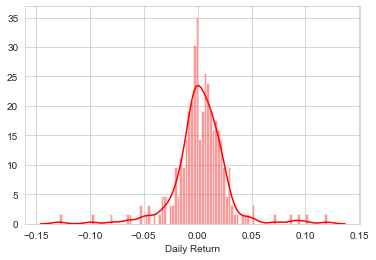

In [37]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color='red')

In [38]:
#Calculating quantile with pandas

apple_risk = rets.AAPL.quantile(0.05)
apple_risk

-0.03308284476401163

the 0.05 empirical quantile of AAPL daily return is -0.033.  
95% of the time, your worst daily lost wouldn't exceed -3.3%.  
For example, if we have $ \$1,000,000$ of investment, our daily investment would not exceed $ \$1,000,000*3.3\% = \$ 33,000$  for $95\%$ of the time.  
Your value at risk is 3.3$%$ of your investment

**b. Amazon Stocks**

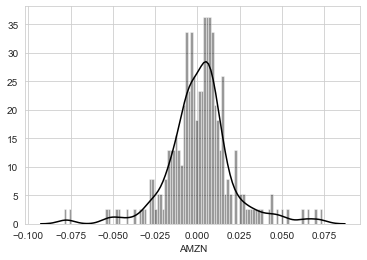

In [39]:
sns.distplot(rets.AMZN.dropna(),bins=100, color = 'black')

In [40]:
amazon_risk = rets.AMZN.quantile(0.05)

amazon_risk

-0.02763362405276297

95% of the time, your worst daily lost wouldn't exceed -2.77%.  


**c. Microsoft Stocks**

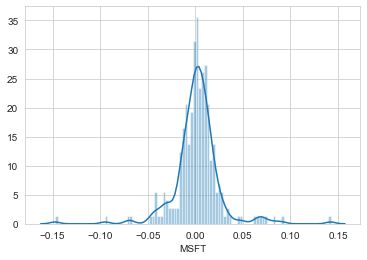

In [41]:
sns.distplot(rets.MSFT.dropna(),bins=100)

In [42]:
microsoft_risk = rets.MSFT.quantile(0.05)

microsoft_risk

-0.03294058745476788

95% of the time, your worst daily lost wouldn't exceed -3.3%.  

**d. Google Stocks**

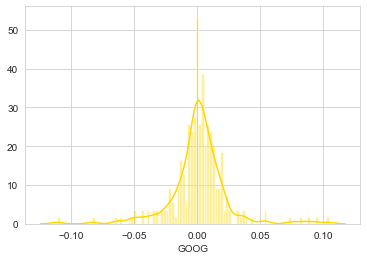

In [43]:
sns.distplot(rets.GOOG.dropna(),bins=100,color='gold')

In [44]:
google_risk = rets.GOOG.quantile(0.05)

google_risk

-0.03459902274899712

95% of the time, your worst daily lost wouldn't exceed -3.46%.  

In [45]:
risks = pd.DataFrame({'Apple':[apple_risk],'Amazon':[amazon_risk],'Microsoft':[microsoft_risk],'Google':[google_risk]})

risks

,Apple,Amazon,Microsoft,Google
0,-0.033083,-0.027634,-0.032941,-0.034599


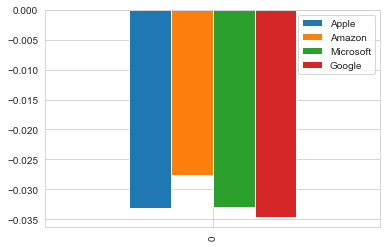

In [46]:
risks.plot.bar()

The risks for these 4 tech companies are not too far away from each other but the lowest risk is of Amazon

## Monte Carlo method
Run trials-> Calculate losses for each trial ->Use aggregation of all the simulations to establish the risk.  
Using GBM  
GBM equation: $ \Delta S =S( \mu \Delta t + \sigma \epsilon \sqrt{\Delta t})$  
$S$:current stock price  
$\mu$: expected return  
$\sigma$: standard deviation of the return  
$t$:time  
$\epsilon$: random variable

**Google**

In [47]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-31,-0.018116,-0.012809,-0.016305,-0.022711
2019-06-03,-0.010110,-0.061071,-0.031048,-0.046409
2019-06-04,0.036584,0.016232,0.027704,0.021782
2019-06-05,0.016143,-0.010284,0.021679,0.005169
2019-06-06,0.014682,0.002034,0.015815,0.009123


In [48]:
days = 365 

dt = 1/days

# mu drift: average return
mu = rets.mean()['GOOG']

# sigma votatility: standard deviation of return
sigma = rets.std()['GOOG']

In [49]:
# function taking starting price, # days and use sigma and mu to calculate daily return

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days) #array of zeros with same length of days
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        # calculate shock from a normal distribution center: mu*dt and scale: sgima*sqrt(dt) [from the equation]
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        # Using GBM equation: price = previous price +drift and shock
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [50]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-05-30,1123.130005,1112.119995,1115.540039,1117.949951,951900,1117.949951,NaN,NaN,NaN,NaN
2019-05-31,1109.599976,1100.180054,1101.290039,1103.630005,1507800,1103.630005,NaN,NaN,NaN,-0.012809
2019-06-03,1065.500000,1025.000000,1065.500000,1036.229980,5130600,1036.229980,NaN,NaN,NaN,-0.061071
2019-06-04,1056.050049,1033.689941,1042.900024,1053.050049,2833500,1053.050049,NaN,NaN,NaN,0.016232
2019-06-05,1053.550049,1030.489990,1051.540039,1042.219971,2168400,1042.219971,NaN,NaN,NaN,-0.010284


Text(0.5, 1.0, 'Monte Carlo Analysis for GOOG')

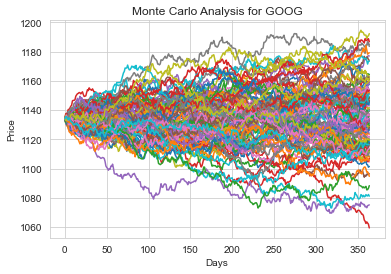

In [51]:
start_price = 1134.000

#run the monte carlo function 100 times

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for GOOG')

In [52]:
#gather array of all the ending price points of 10000 runs
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Use quantile to identify the risk of this stock

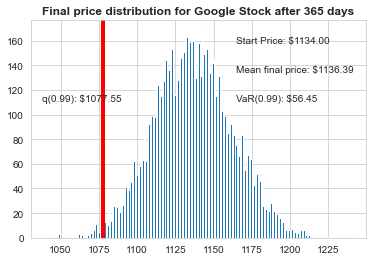

In [53]:
#define q as a 1 percent empirical quantile
# 99% of the values should fit within the output
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#add some text on top of the figure:

#Starting Price
plt.figtext(0.6,0.8,s='Start Price: $%.2f' %start_price)
#Mean ending Price
plt.figtext(0.6,0.7,'Mean final price: $%.2f' %simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price - q,))

#Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' %q)

#Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Histogram of all the final prices through 10,000 simulations.  
Start Price is $\$1134$ from GOOG data.  
Mean final price is $\$1136.62$ after 10,000 simulations: this is a stable stock, as we saw before, the expected return for GOOG is quite low  
Value at Risk: 99% Confidence Interval is: $\$56.78$  

99% of the time, the stock will not get lower than $\$1077.22$

*Further questions:*  
1. Estimate the value at risk using both methods for other type of stock
2. Build a practice portfolio to see how well you can predict risk value with real stock info
3. Look further into correlation of 2 stocks and see if that give you insight into future possible stock prices

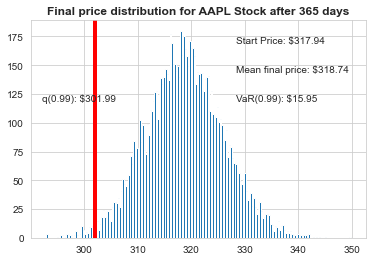

In [54]:
start_price = AAPL.iloc[-1,5]

#gather array of all the ending price points of 10000 runs
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
#define q as a 1 percent empirical quantile
# 99% of the values should fit within the output
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#add some text on top of the figure:

#Starting Price
plt.figtext(0.6,0.8,s='Start Price: $%.2f' %start_price)
#Mean ending Price
plt.figtext(0.6,0.7,'Mean final price: $%.2f' %simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price - q,))

#Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' %q)

#Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#Title
plt.title(u"Final price distribution for AAPL Stock after %s days" % days, weight='bold');

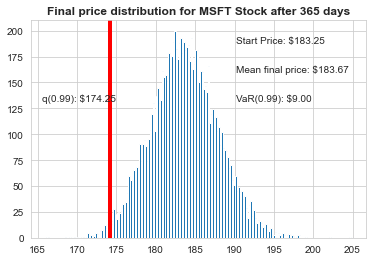

In [55]:
start_price = MSFT.iloc[-1,5]

#gather array of all the ending price points of 10000 runs
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
#define q as a 1 percent empirical quantile
# 99% of the values should fit within the output
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#add some text on top of the figure:

#Starting Price
plt.figtext(0.6,0.8,s='Start Price: $%.2f' %start_price)
#Mean ending Price
plt.figtext(0.6,0.7,'Mean final price: $%.2f' %simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price - q,))

#Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' %q)

#Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#Title
plt.title(u"Final price distribution for MSFT Stock after %s days" % days, weight='bold');

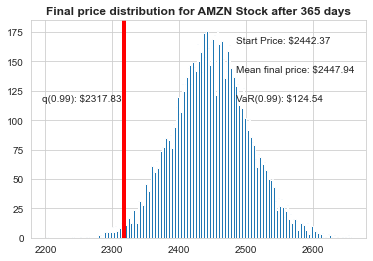

In [56]:
start_price = AMZN.iloc[-1,5]

#gather array of all the ending price points of 10000 runs
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
#define q as a 1 percent empirical quantile
# 99% of the values should fit within the output
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#add some text on top of the figure:

#Starting Price
plt.figtext(0.6,0.8,s='Start Price: $%.2f' %start_price)
#Mean ending Price
plt.figtext(0.6,0.7,'Mean final price: $%.2f' %simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price - q,))

#Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' %q)

#Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#Title
plt.title(u"Final price distribution for AMZN Stock after %s days" % days, weight='bold');